In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:20,.2f}'.format
import folium
import json
from pylab import rcParams
folium.__version__ == '0.5.0'
%matplotlib inline


# Assignment 1: Eurostat

**We load data from this database:** http://ec.europa.eu/eurostat/data/database

**Data we choose:** http://ec.europa.eu/eurostat/tgm/table.do?tab=table&init=1&plugin=1&pcode=teilm021&language=en

**Metadata**: http://ec.europa.eu/eurostat/cache/metadata/en/une_esms.htm
   - Data are presented in seasonally adjusted form.

**Json GeoData:** https://github.com/codeforamerica/click_that_hood/tree/master/public/data

**Harmonised unemployment rate by sex - age group 15-24**

The unemployment rate represents unemployed persons as a percentage of the labour force based on International Labour Office (ILO) definition, which here refers to the total number of employed and unemployed persons aged 15 to 24. 

Unemployed persons comprise here persons aged 15 to 24 who: 
   - are without work; 
   - are available to start work within the next two weeks; 
   - and have been actively seeking work in the past four weeks or had already found a job to start within the next three months. 

**Unit:** Percentage of active population.

**Age: ** Less than 25 years, From 25 to 74 years, Total

**Sex:** Males, Females, Total

**Countries:** (We selected just countries form EU):
'Belgium', 'Bulgaria', 'Czech Republic', 'Denmark', 'Germany',
       'Estonia', 'Ireland', 'Greece', 'Spain', 'France', 'Croatia',
       'Italy', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary',
       'Malta', 'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'United Kingdom'

**Time:** July 2017 & July 2016. The most recent & complete data was july 2017, so we decided to compare those data.

In [2]:
data = pd.read_csv('data/eu-unemployment.csv')
data = data[ data['UNIT']== 'Percentage of active population']
data=data[['GEO','TIME','AGE','SEX','Value']]
data.head()

,GEO,TIME,AGE,SEX,Value
3,Belgium,2016M07,Total,Total,7.9
4,Belgium,2016M07,Total,Males,7.9
5,Belgium,2016M07,Total,Females,7.9
9,Belgium,2016M07,Less than 25 years,Total,20.7
10,Belgium,2016M07,Less than 25 years,Males,21.8


In [3]:
data2017 = data[(data['TIME'] == '2017M07') & (data['SEX']=='Total') & (data['AGE']=='Total')]
data2017 = data2017[['GEO','Value']]
data2017 = data2017.replace(to_replace=':',value=-1)
data2016 = data[(data['TIME'] == '2016M07') & (data['SEX']=='Total') & (data['AGE']=='Total')]
data2016 = data2016[['GEO','Value']]
data2016 = data2016.replace(to_replace=':',value=-1)

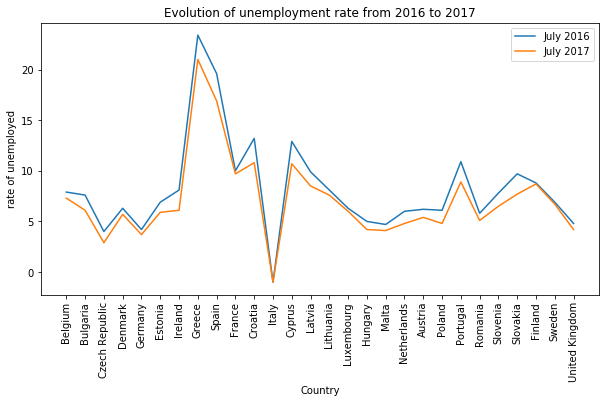

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
x = [i for i in np.arange(0, len(data2016))]
plt.xticks(x, data2016['GEO'], rotation='vertical')
ax.plot(x, data2016['Value'])
ax.plot(x, data2017['Value'])
ax.set_ylabel("rate of unemployed")
ax.set_xlabel("Country")
ax.legend(["July 2016", "July 2017"])
plt.title('Evolution of unemployment rate from 2016 to 2017')

In [5]:
data2017M = data[(data['TIME'] == '2017M07') & (data['SEX']=='Males') & (data['AGE']=='Total')]
data2017M = data2017M[['GEO','Value']]
data2017M = data2017M.replace(to_replace=':',value=-1)
data2017F = data[(data['TIME'] == '2016M07') & (data['SEX']=='Females') & (data['AGE']=='Total')]
data2017F = data2017F[['GEO','Value']]
data2017F = data2017F.replace(to_replace=':',value=-1)

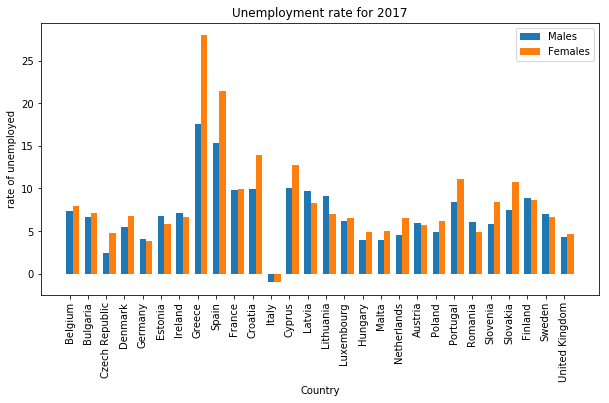

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(data2017M))  # the x locations for the groups
width = 0.35       # the width of the barsplt.xticks(x, data2017M['GEO'], rotation='vertical')
plt.xticks(x, data2016['GEO'], rotation='vertical')
ax.bar(ind, data2017M['Value'],width)
ax.bar(ind + width, data2017F['Value'],width)
ax.set_ylabel("rate of unemployed")
ax.set_xlabel("Country")
ax.legend(["Males", "Females"])
plt.title('Unemployment rate for 2017')

In [7]:
data2017['Value'] = pd.to_numeric(data2017['Value'])

In [8]:
europe_geo_path = r'topojson/europe.geojson'
m_eu = folium.Map([50,20], tiles='cartodbpositron', zoom_start=4)
m_eu.choropleth(geo_data=europe_geo_path, data=data2017,
             columns=['GEO','Value'],
             key_on='feature.properties.name',
             fill_color='OrRd', fill_opacity=0.5, line_opacity=0.5,
             legend_name='Total Unemployment Rate (%) July 2017')
m_eu

In [9]:
m_eu.save('UE_unemployment.html')

# Assignement 2


Taux de chômage : Nombre de chômeurs inscrits au jour de référence (dernier jour du mois) divisé par le nombre de personnes actives, multiplié par 100. Le nombre des personnes actives est recensé chaque année par l’Office fédéral de la statistique dans le cadre du relevé structurel (recensement de la population). Il s’élève, depuis le 1<sup>er</sup> janvier 2014, à 4'493'249 personnes d’après le pooling de trois ans des données récoltées dans le cadre des relevés structurels de 2012 à 2014. Le nombre des personnes actives utilisé par le SECO comprend aussi les diplomates et fonctionnaires internationaux domiciliés en Suisse.
source: https://www.amstat.ch/v2/definition.jsp?lang=fr

First we downloaded excel file representing the unemployment rate in Switzerland by canton. We chose to take the rate of 2017 (from January to September) which is the latest data available.

In [194]:
unemploymentRateByCantons = pd.read_excel('data/tauxDeChomage.xlsx')
unemploymentRateByCantons = {'cantons': unemploymentRateByCantons.Canton[1:], 'unemploymentRate': unemploymentRateByCantons.Total[1:]}
unemploymentRateByCantons = pd.DataFrame(data=unemploymentRateByCantons)
unemploymentRateByCantons.unemploymentRate = unemploymentRateByCantons.unemploymentRate.astype(float)

In [195]:
cantonsGeoPath = r'topojson/switzerland.geojson'
mSwiss = folium.Map([46.519962, 8], tiles='cartodbpositron', zoom_start=7)
mSwiss.choropleth(geo_data=cantonsGeoPath, data=unemploymentRateByCantons,
             columns=['cantons', 'unemploymentRate'],
             key_on='feature.properties.name',
             fill_color='OrRd', fill_opacity=0.5, line_opacity=0.5,
             legend_name='Unemployment rate (%) - June 2017 -')
mSwiss

In a second part, we will work with an other dataset with more information. This file contain number of unemployed people and the number of people employed but seeking for a job monthly for this year(January-September 2017). 
In a first time we create two dataFrames containing the mean number of unemployed people by month grouped by canton and the mean number of jobseeker grouped by canton.

In [12]:
unemploymentData = pd.read_excel('data/jobSeeker.xlsx',header=2)
#We delete the columns and row we don't want to sum
unemploymentData = unemploymentData.drop('Mois', 1)
unemploymentData = unemploymentData.drop(unemploymentData.index[-1],0)

cantons = unemploymentData.iloc[:,0]
unemployed = pd.DataFrame(data = unemploymentData.iloc[:,1::2])
unemployed = unemployed.set_index(cantons)
unemployed = unemployed.groupby(['Canton']).sum()/12
unemployed = unemployed.sum(axis=1)

jobSeeker = unemploymentData.iloc[:,::2]
jobSeeker = jobSeeker.groupby(['Canton']).sum()/12
jobSeeker = jobSeeker.sum(axis=1)

cantons = cantons.drop(cantons.index[0])

In a second time we compute the number of active people in each canton to determine the percent of unemployed people without the jobseeker. We then compute and display the percent of unemployed people without the jobseeker.

number_active = number_unemplyed * unemployement_rate

In [196]:
totalActive = pd.DataFrame(columns = ['Canton','TotalActivePopulation'])
for canton in cantons:
    totalActive.loc[len(totalActive)] = [canton,(int(unemployed[canton]*100 / unemploymentRateByCantons[unemploymentRateByCantons['cantons'] == canton]['unemploymentRate'].values[0]))]

unemployedWithoutJobSeeker = pd.DataFrame(columns = ['Canton','ratio'])
for canton in cantons:
    unemployedWithoutJobSeeker.loc[len(unemployedWithoutJobSeeker)] = [canton,(unemployed[canton] - jobSeeker.loc[canton]) / totalActive[totalActive['Canton'] == canton]['TotalActivePopulation'].values[0]*100]
                                                                       
                                                                       
                                                                       
cantonsGeoPath = r'topojson/switzerland.geojson'
mSwissJobSeeker = folium.Map([46.519962, 8], tiles='cartodbpositron', zoom_start=7)
mSwissJobSeeker.choropleth(geo_data=cantonsGeoPath, data=unemployedWithoutJobSeeker,
             columns=['Canton', 'ratio'],
             key_on='feature.properties.name',
             fill_color='OrRd', fill_opacity=0.5, line_opacity=0.5,
             legend_name='Unemployment rate without the jobseeker(%) - June 2017 -')
mSwissJobSeeker

As a bonus we plot the percent of employed people plus the job seeker to have a better understanding of many people is looking for a job globally. To our point of view this approach is interesting because it's shows globaly the workload for the employement agency or headhunters in each canton.

In [199]:
percentOfJobSeeker = pd.DataFrame(columns = ['Canton','Percent of jobSeeker'])
for canton in cantons:
    percentOfJobSeeker.loc[len(percentOfJobSeeker)] = [canton,(jobSeeker.loc[canton] + unemployed[canton]) / totalActive[totalActive['Canton'] == canton]['TotalActivePopulation'].values[0]*100]

cantonsGeoPath = r'topojson/switzerland.geojson'
mSwissJobSeeker = folium.Map([46.519962, 8], tiles='cartodbpositron', zoom_start=7)
mSwissJobSeeker.choropleth(geo_data=cantonsGeoPath, data=percentOfJobSeeker,
             columns=['Canton', 'Percent of jobSeeker'],
             key_on='feature.properties.name',
             fill_color='OrRd', fill_opacity=0.5, line_opacity=0.5,
             legend_name='People looking for a job (%) - June 2017 -')
mSwissJobSeeker

# Assignment 3: Amstat


**We load data from this database:** https://www.amstat.ch/v2/index.jsp

**Data we choose:** Unemployment rate in Swiss according to nationality and age.

**Json GeoData:** https://github.com/codeforamerica/click_that_hood/tree/master/public/data

**Time:** January to September 2017. A mean is calculated.

### Unemployment rates in Switzerland between Swiss and foreign workers
We load the data in order to split them in two dataframes. One for Swiss and the second one for the foreingners.

In [200]:
unemploymentDataByNationalities = pd.read_excel('data/JobSeekerByNationalities.xlsx')
unemploymentDataByNationalities = {'cantons': unemploymentDataByNationalities.Canton[1:], 'Nationality': unemploymentDataByNationalities.Nationality[1:], 'unemploymentRate': unemploymentDataByNationalities.Total[1:]}
unemploymentDataByNationalities = pd.DataFrame(data=unemploymentDataByNationalities)
unemploymentDataByNationalities.unemploymentRate = unemploymentDataByNationalities.unemploymentRate.astype(float)
unemploymentDataByNationalities.head()

,Nationality,cantons,unemploymentRate
1,Etrangers,Zurich,5.90
2,Suisses,Zurich,2.70
3,Etrangers,Berne,6.40
4,Suisses,Berne,2.00
5,Etrangers,Lucerne,4.50


#### Unemployment rates for foreign workers

In [201]:
unemploymentDataForeingners = unemploymentDataByNationalities[unemploymentDataByNationalities.Nationality=="Etrangers"]
unemploymentDataForeingners = unemploymentDataForeingners.drop('Nationality', 1)

###### We draw the choropleth associated

In [202]:
cantonsGeoPath = r'topojson/switzerland.geojson'
mSwissUnemployment = folium.Map([46.519962, 8], tiles='cartodbpositron', zoom_start=7)
mSwissUnemployment.choropleth(geo_data=cantonsGeoPath, data=unemploymentDataForeingners,
             columns=['cantons', 'unemploymentRate'],
             key_on='feature.properties.name',
             fill_color='OrRd', fill_opacity=0.5, line_opacity=0.5,
             legend_name='Unemployment rate in Switzerland (Foreign) (%) - 2017')
mSwissUnemployment

#### Unemployment rates for Swiss workers

In [203]:
unemploymentDataSwiss = unemploymentDataByNationalities[unemploymentDataByNationalities.Nationality=="Suisses"]
unemploymentDataSwiss = unemploymentDataSwiss.drop('Nationality', 1)

###### We draw the choropleth associated

In [204]:
cantonsGeoPath = r'topojson/switzerland.geojson'
mSwissUnemployment = folium.Map([46.519962, 8], tiles='cartodbpositron', zoom_start=7)
mSwissUnemployment.choropleth(geo_data=cantonsGeoPath, data=unemploymentDataSwiss,
             columns=['cantons', 'unemploymentRate'],
             key_on='feature.properties.name',
             fill_color='OrRd', fill_opacity=0.5, line_opacity=0.5,
             legend_name='Unemployment rate in Switzerland (Swizz) (%) - 2017')
mSwissUnemployment

### Unemployment rates in Switzerland according to several parameters
**We load data from this database:**  age, nationality.
Due to this several parameters, we choose to draw a bar plot.

**Time:** September 2017



#### Clean and group the data:

In [205]:
unemploymentDataDetail = pd.read_excel('data/UnemploymentSwissDetail.xlsx')
unemploymentDataDetail = unemploymentDataDetail[1:]
unemploymentDataDetail['Septembre 2017'] = unemploymentDataDetail['Septembre 2017'].astype(float)

#Clean
unemploymentDataDetail = unemploymentDataDetail.drop('Mois', 1)
unemploymentDataDetail = unemploymentDataDetail.dropna()
unemploymentDataDetail = unemploymentDataDetail.drop('Unnamed: 3', 1)

#Rename
unemploymentDataDetail = unemploymentDataDetail.rename(columns={"Classes d'âge 15-24, 25-49, 50 ans et plus": 'AgeCategory'})

#Create a new column
unemploymentDataDetail['Type'] = unemploymentDataDetail.Nationalité +" "+ unemploymentDataDetail.AgeCategory
unemploymentDataDetail = unemploymentDataDetail.drop('Nationalité', 1)
unemploymentDataDetail = unemploymentDataDetail.drop('AgeCategory', 1)
unemploymentDataDetail.head()


,Canton,Septembre 2017,Type
1,Zurich,"1,015.00",Etrangers 1
2,Zurich,"8,846.00",Etrangers 2
3,Zurich,"2,250.00",Etrangers 3
5,Zurich,"2,405.00",Suisses 1
6,Zurich,"8,207.00",Suisses 2


#### Re-order the dataframe

In [206]:
unemploymentDataDetail = unemploymentDataDetail.pivot(index='Canton', columns='Type', values='Septembre 2017')
unemploymentDataDetail.head()

Type,Etrangers 1,Etrangers 2,Etrangers 3,Suisses 1,Suisses 2,Suisses 3
Canton,,,,,,
Appenzell Rhodes-Extérieures,21.00,108.00,50.00,44.00,151.00,149.00
Appenzell Rhodes-Intérieures,6.00,10.00,7.00,10.00,14.00,15.00
Argovie,597.00,"3,270.00","1,105.00",958.00,"2,792.00","1,962.00"
Berne,597.00,"3,316.00",987.00,"1,406.00","4,457.00","2,895.00"
Bâle-Campagne,165.00,"1,089.00",342.00,359.00,"1,270.00",857.00


### Bar Plot:

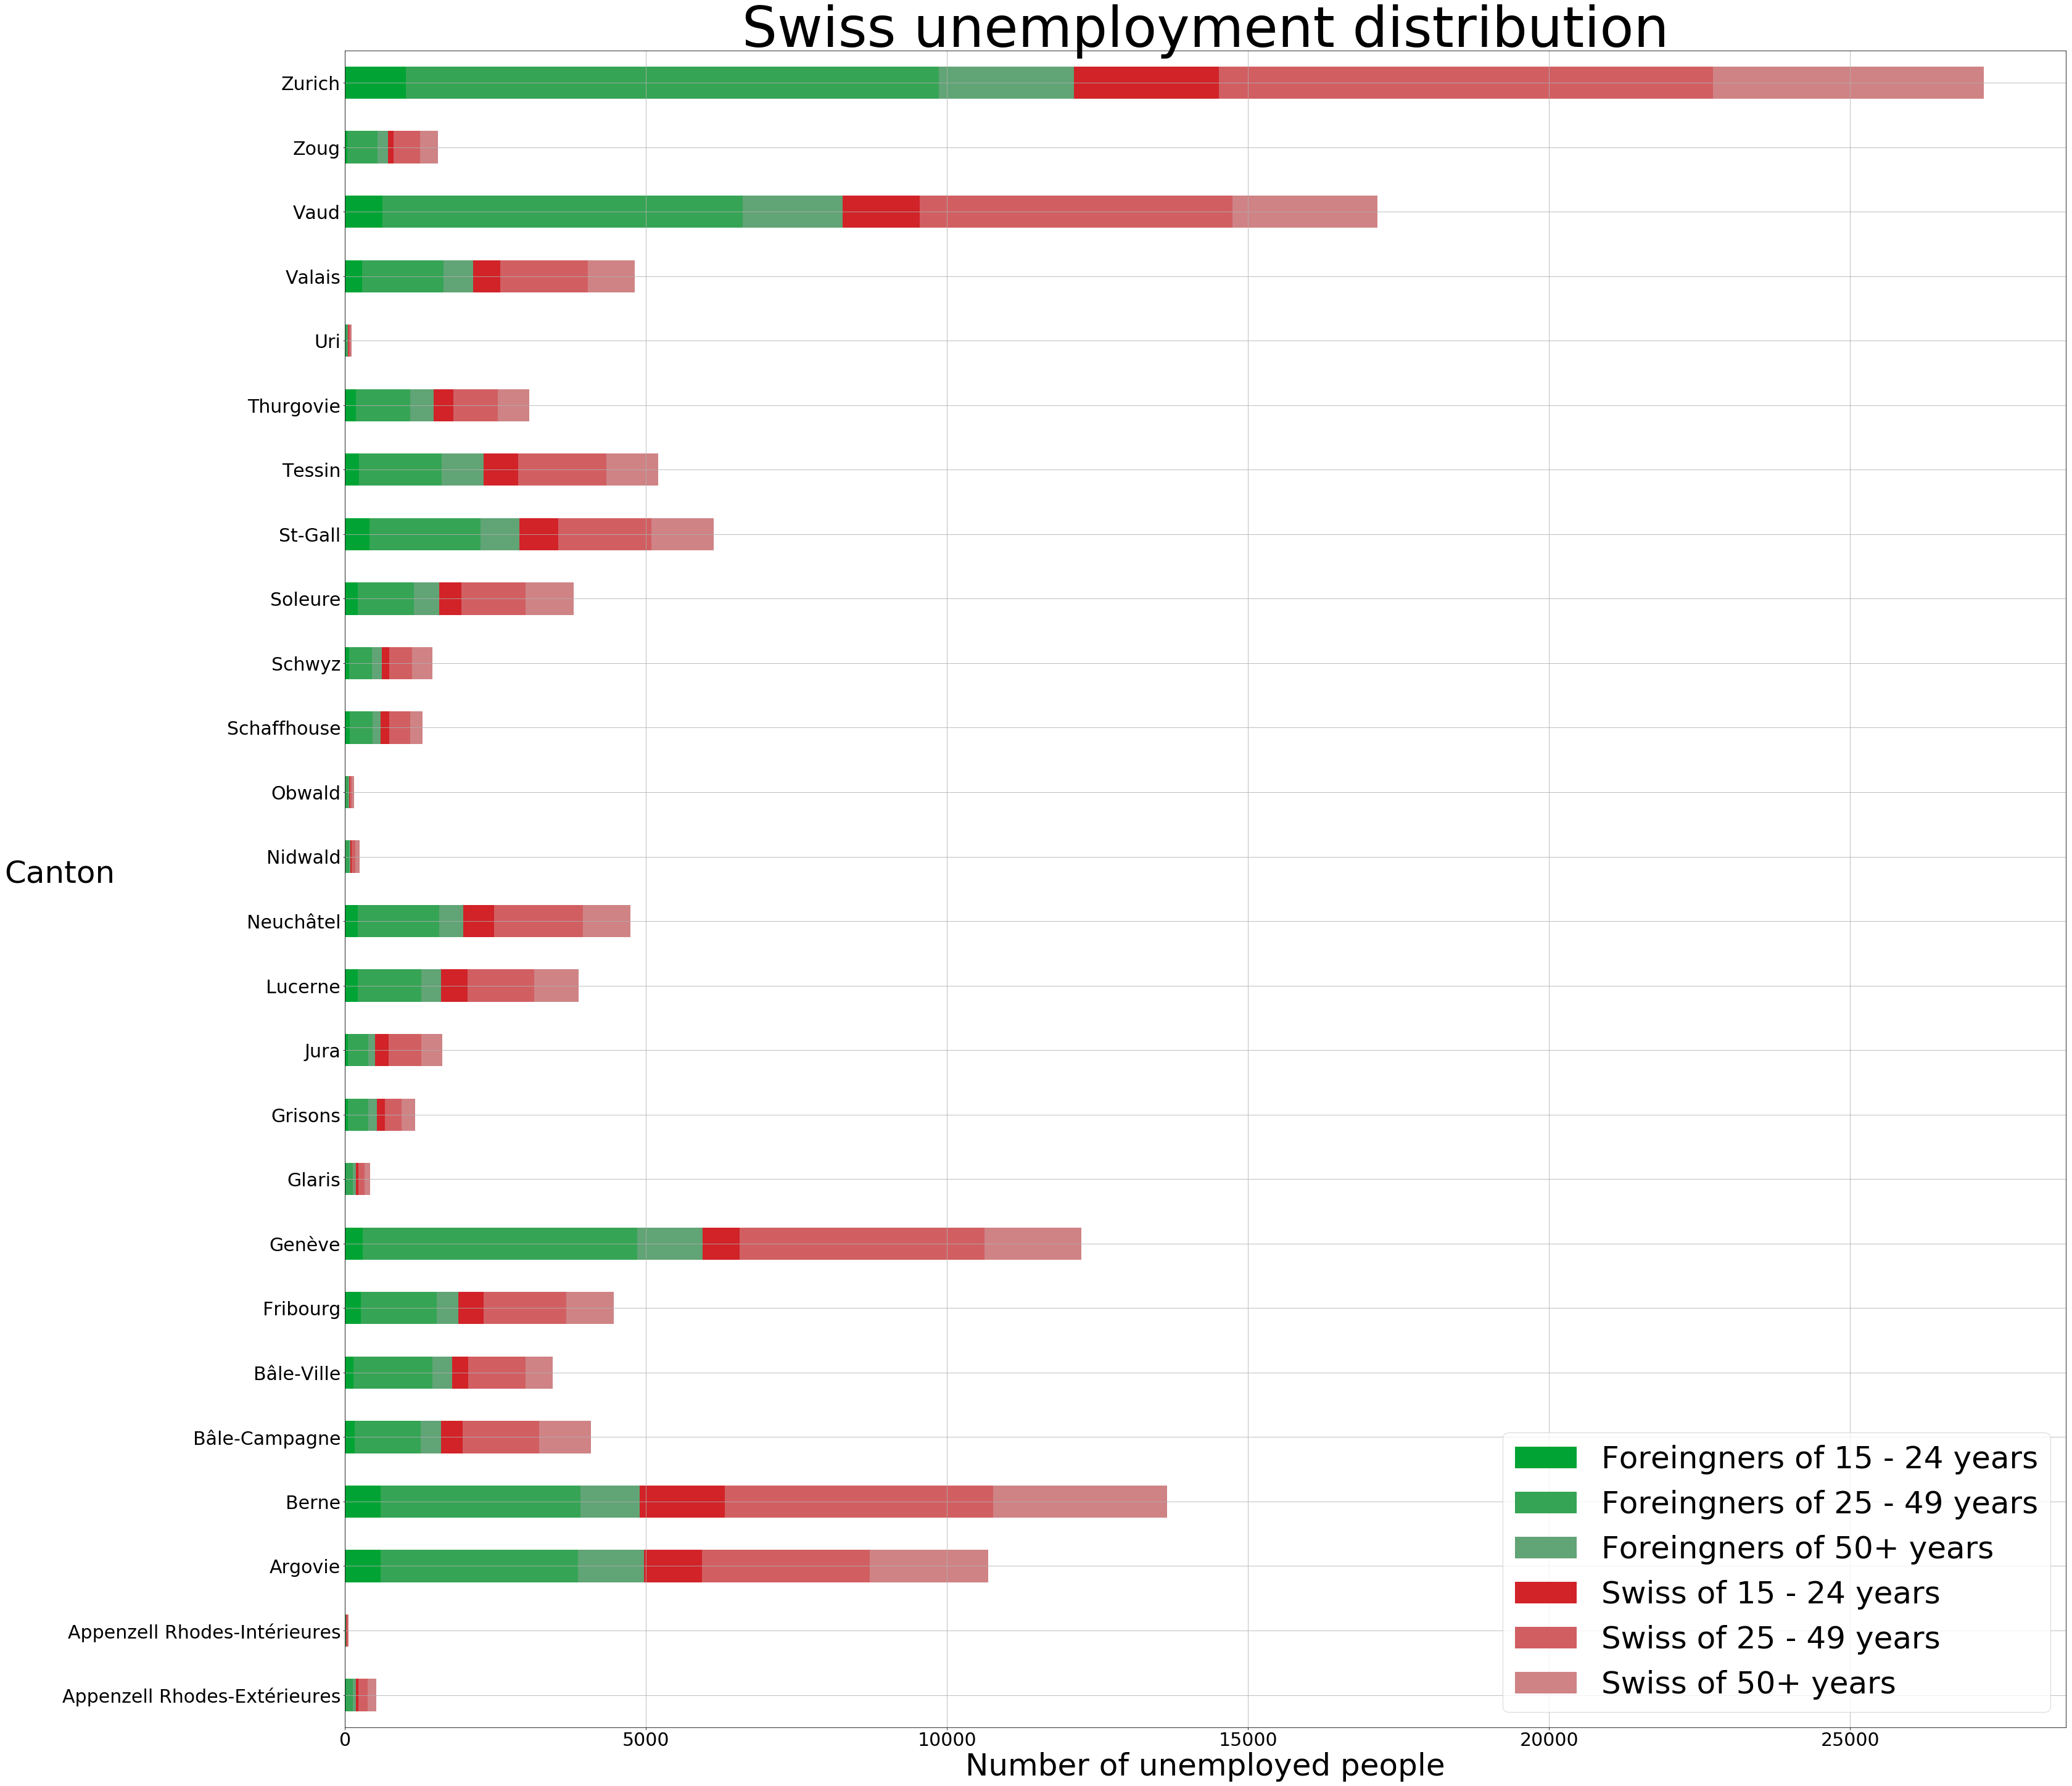

In [207]:
rcParams['figure.figsize'] = 50,50
unemploymentDataDetail.plot.barh(stacked=True, grid =True,fontsize= 30, color=['#01A434', '#36A455', '#61A476','#D12328', '#D15F62', '#CF8385'])
plt.xlabel('Number of unemployed people',fontsize = 50)
plt.ylabel('Canton', fontsize=50,rotation = 0)
plt.legend(['Foreingners of 15 - 24 years', 'Foreingners of 25 - 49 years', 'Foreingners of 50+ years','Swiss of 15 - 24 years', 'Swiss of 25 - 49 years', 'Swiss of 50+ years'],fontsize=50)
plt.title("Swiss unemployment distribution",fontsize=90)
plt.show()
